# Statistical Analysis

## Reading the data and setting imports


In [73]:
import pandas as pd 
import ast
import matplotlib.pyplot as plt
df = pd.read_csv('../data/processed/df_final_chart.csv')


# Step 1: Convert string representations of lists to actual lists
df['general_category'] = df['general_category'].apply(ast.literal_eval)

# Step 2: Explode the general_category column
df = df.explode('general_category')

# Step 3: Count unique occurrences
category_counts = df['general_category'].value_counts()

# Removing outliers
df_filtered = df[df['daysBetween'] < 1000]


df.head(2)

,Year,Model,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,summary,daysBetween,components_list,sentiment,general_category,word_count,char_count
0,2021,F-350 REGULAR CAB,0,0,0,0,2024-12-31,2025-01-28,The contact owns a 2021 Ford F-350. The contac...,28,"['FUEL SYSTEM', ' DIESEL']",-0.009091,Engine and Performance,77,565
0,2021,F-350 REGULAR CAB,0,0,0,0,2024-12-31,2025-01-28,The contact owns a 2021 Ford F-350. The contac...,28,"['FUEL SYSTEM', ' DIESEL']",-0.009091,Other Problems,77,565


## Crash and Injury Analysis
Ford can prioritize safety campaigns by understanding which problems are most frequently associated with crashes, injuries, or deaths.

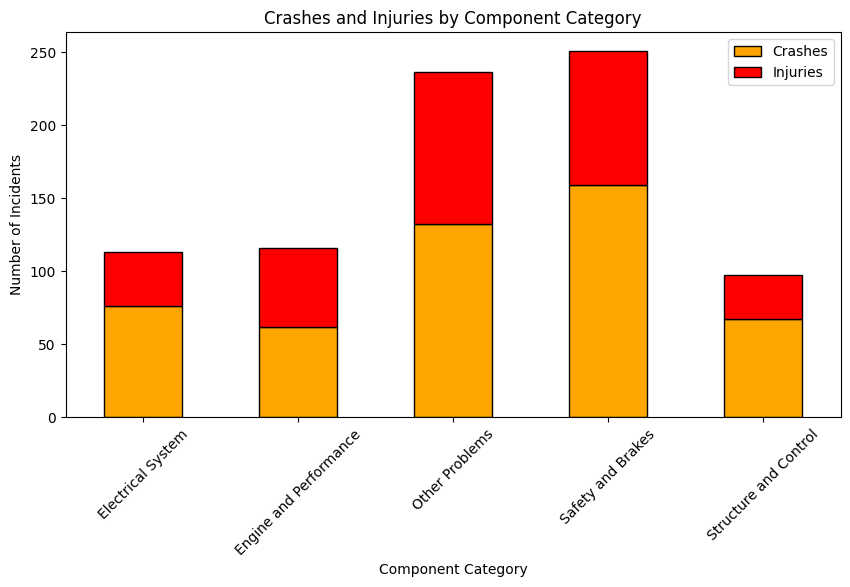

In [74]:
incident_data = df.groupby('general_category')[['crash', 'numberOfInjuries']].sum()

incident_data.plot(kind='bar', stacked=True, figsize=(10, 5), color=['orange', 'red'], edgecolor='black')
plt.title('Crashes and Injuries by Component Category')
plt.xlabel('Component Category')
plt.ylabel('Number of Incidents')
plt.legend(['Crashes', 'Injuries'])
plt.xticks(rotation=45)
plt.show()


## Analysis of Crash and Fire 
We'll use a grouped bar plot to compare the number of complaints involving crashes and fires across different models.

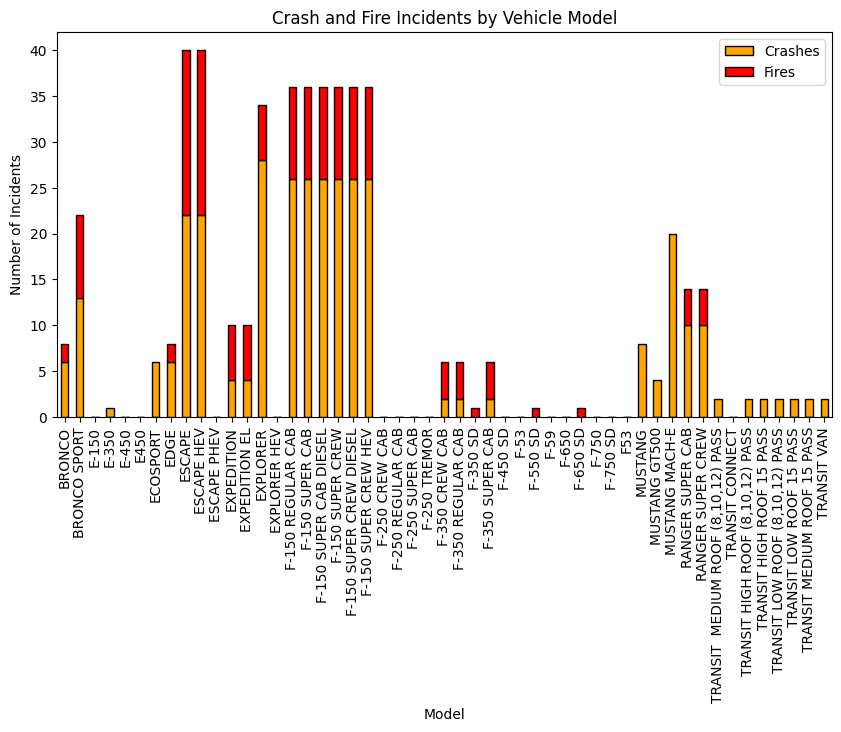

In [59]:
# Group by model and sum crash and fire incidents
incident_data = df.groupby('Model')[['crash', 'fire']].sum()

# Plot incidents by model
incident_data.plot(kind='bar', stacked=True, figsize=(10, 5), color=['orange', 'red'], edgecolor='black')
plt.title('Crash and Fire Incidents by Vehicle Model')
plt.xlabel('Model')
plt.ylabel('Number of Incidents')
plt.legend(['Crashes', 'Fires'])
plt.show()


## Seasonal Trends in Complaints
Checking for seasonal trends can help Ford understand whether certain problems arise more frequently in specific months.

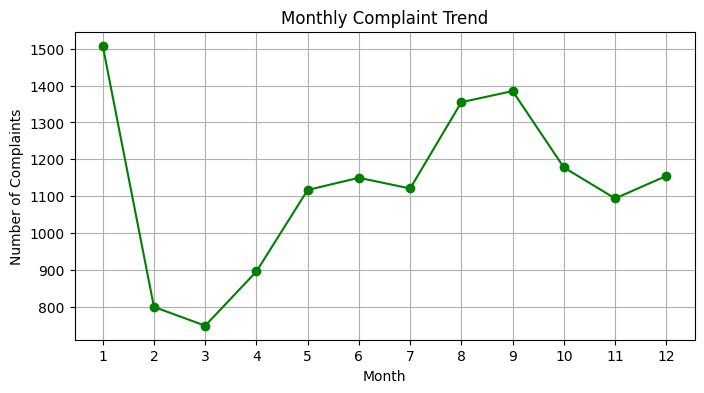

In [27]:
df['month'] = pd.to_datetime(df['dateComplaintFiled']).dt.month
monthly_trend = df.groupby('month').size()

plt.figure(figsize=(8, 4))
monthly_trend.plot(kind='line', marker='o', color='green')
plt.title('Monthly Complaint Trend')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


## Sentiment Analysis and Complaint Urgency
Analyzing customer sentiment can help Ford identify complaints that require urgent attention.

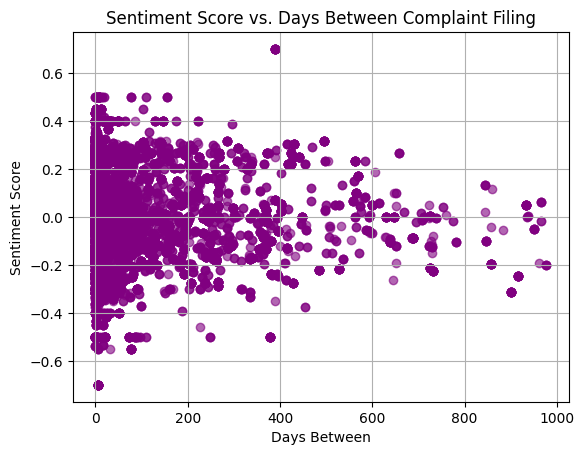

In [45]:
plt.scatter(df_filtered['daysBetween'], df_filtered['sentiment'], alpha=0.6, color='purple')
plt.title('Sentiment Score vs. Days Between Complaint Filing')
plt.xlabel('Days Between')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


## Sentiment Analysis and Complaint Urgency
Analyzing customer sentiment can help Ford identify complaints that require urgent attention.

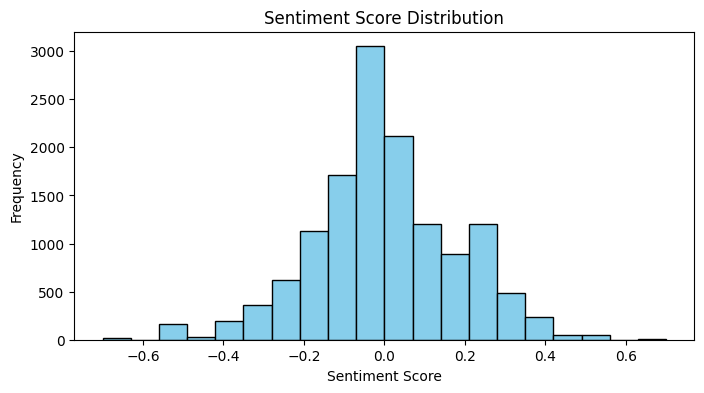

In [12]:
# Sentiment distribution
plt.figure(figsize=(8, 4))plt.scatter(df['daysBetween'], df['sentiment'], alpha=0.6, color='purple')
plt.title('Sentiment Score vs. Days Between Complaint Filing')
plt.xlabel('Days Between')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


## High-Risk Models and Components
Identifying models and components frequently associated with safety-related complaints (e.g., crashes, fires, airbag issues) is crucial for risk management.

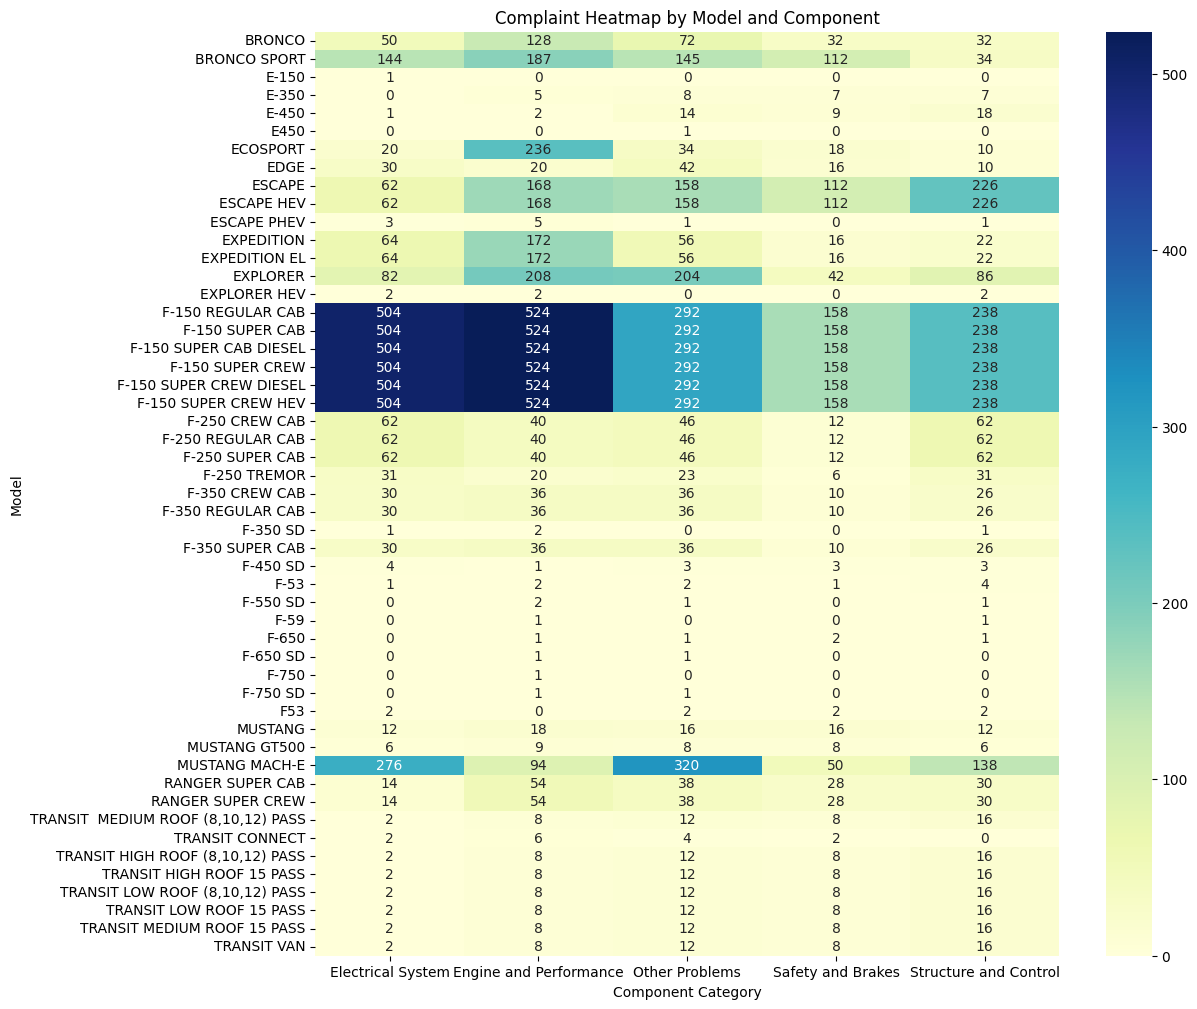

In [83]:
import seaborn as sns

# Pivot table of complaints by model and general category
heatmap_data = df.explode('general_category').pivot_table(
    index='Model', columns='general_category', values='summary', aggfunc='count', fill_value=0
)

plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Complaint Heatmap by Model and Component')
plt.xlabel('Component Category')
plt.ylabel('Model')
plt.show()


## Component Correlation with Sentiment and Time to Resolution
 We can explore whether certain component issues lead to faster resolutions or more negative sentiment in complaints.

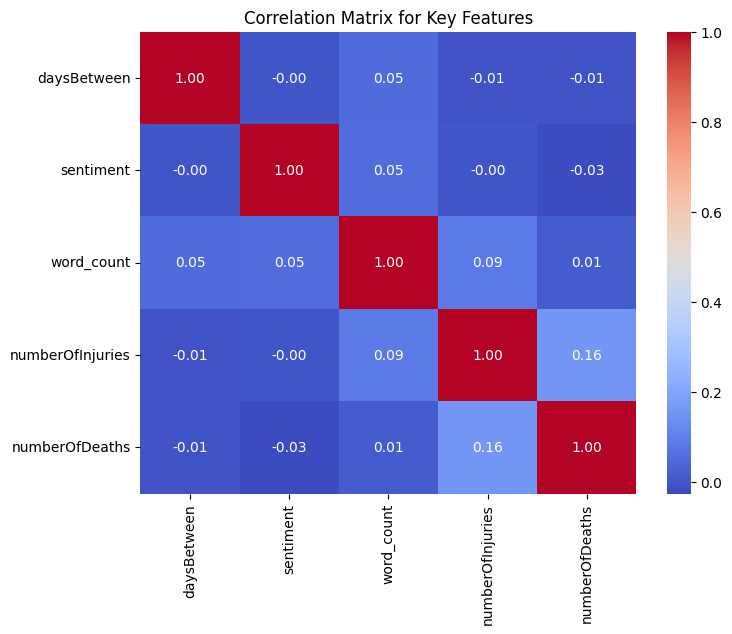

In [54]:
# Correlation matrix for numerical features
corr_matrix = df[['daysBetween', 'sentiment', 'word_count', 'numberOfInjuries', 'numberOfDeaths']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Key Features')
plt.show()


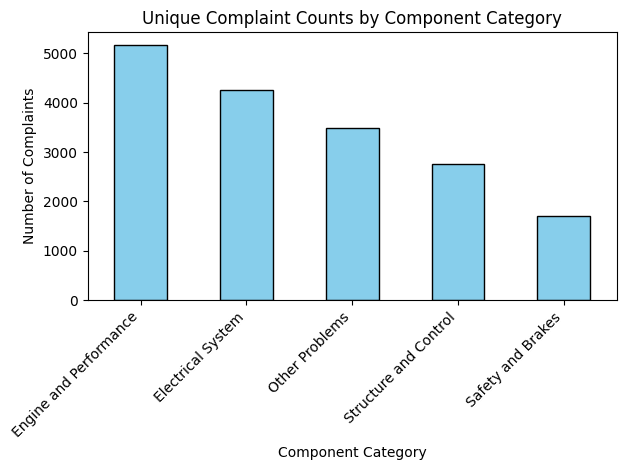

In [66]:
import matplotlib.pyplot as plt

# Plot the bar chart
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Unique Complaint Counts by Component Category')
plt.xlabel('Component Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


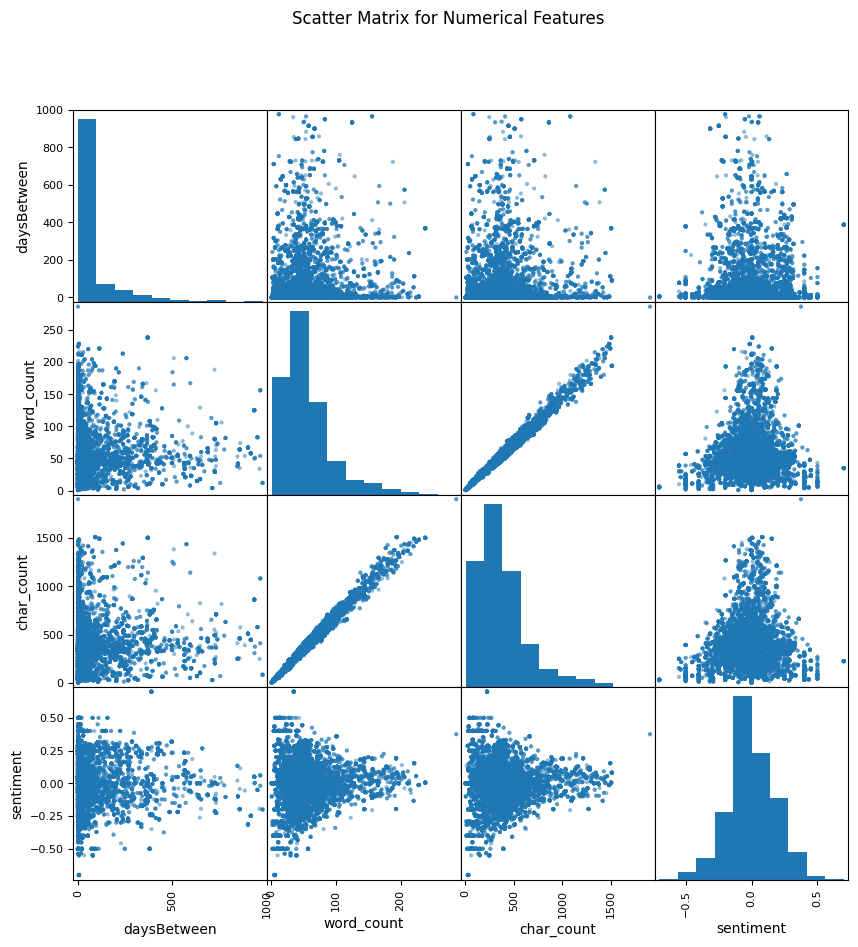

In [44]:
from pandas.plotting import scatter_matrix

# Select relevant columns
num_cols = ['daysBetween', 'word_count', 'char_count', 'sentiment']
scatter_matrix(df_filtered[num_cols], figsize=(10, 10), diagonal='hist')
plt.suptitle('Scatter Matrix for Numerical Features')
plt.show()
